In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.linear_model import LinearRegression
import numpy as np

Over lunch in downtown Redwood City, my good friend and I saw quite few dog walkers as we enjoyed our nice Thai food. My friend mused that because of the high cost of living in the Bay Area, young couples cannot afford children and instead choose to raise dogs. Interesting hypothesis! I decided, as a budding data scientist, to regress dog population with cost of living (and around 15 other variables) to see if I could find a correlation. I found dog data from [a report published by the American Veterinary Medical Association](https://ebusiness.avma.org/Files/ProductDownloads/2019%20ECO-PetDemoUpdateErrataFINAL-20190501.pdf) and potential regressors from sources such as the *US Census Bureau* and the *CDC* to see if I could find a strong correlation. Below is my code for this small project. Enjoy! (And yes, at Panda Express I ordered the Orange Chicken and the String Bean Chicken Breast.)

In [2]:
#dog data
main_df = pd.read_csv('States_dogs_pandas.csv')[:49]
main_df.head()
main_df.tail()

,State,Number of Households (in thousands),Percent of Households who Owned Dogs,Number of Dog-Owning Households (in thousands),Average Number of Dogs per Household,Dog Population (1000s)
44,Utah,"1,014",36.20%,367,1.6,365
45,Wyoming,240,36%,86,1.7,65
46,California,"13,911",40.10%,"5,576",1.6,"8,690"
47,Oregon,"1,606",37.80%,608,1.6,997
48,Washington,"2,844",42.80%,"1,217",1.5,"1,846"


In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   State                                           49 non-null     object 
 1   Number of Households (in thousands)             49 non-null     object 
 2   Percent of Households who Owned Dogs            49 non-null     object 
 3   Number of Dog-Owning Households (in thousands)  49 non-null     object 
 4   Average Number of Dogs per Household            49 non-null     float64
 5   Dog Population (1000s)                          49 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.4+ KB


At this point, I realized that aside from the "Average Number of Dogs per Household" column, all the rest of the columns had the datatype of object. I had to convert each column into the float datatype.

In [4]:
main_df['Number of Households (in thousands)'] = main_df['Number of Households (in thousands)'].str.replace(',', '').astype(float)

In [5]:
main_df['Number of Dog-Owning Households (in thousands)'] = main_df['Number of Dog-Owning Households (in thousands)'].str.replace(',', '').astype(float)
main_df['Dog Population (1000s)'] = main_df['Dog Population (1000s)'].str.replace(',', '').astype(float)

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   State                                           49 non-null     object 
 1   Number of Households (in thousands)             49 non-null     float64
 2   Percent of Households who Owned Dogs            49 non-null     object 
 3   Number of Dog-Owning Households (in thousands)  49 non-null     float64
 4   Average Number of Dogs per Household            49 non-null     float64
 5   Dog Population (1000s)                          49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [7]:
main_df['Percent of Households who Owned Dogs'] = main_df['Percent of Households who Owned Dogs'].str.rstrip('%').astype('float') / 100.0

In [8]:
main_df.corr()

,Number of Households (in thousands),Percent of Households who Owned Dogs,Number of Dog-Owning Households (in thousands),Average Number of Dogs per Household,Dog Population (1000s)
Number of Households (in thousands),1.000000,-0.037280,0.981386,-0.079952,0.960635
Percent of Households who Owned Dogs,-0.037280,1.000000,0.091135,0.726409,0.049776
Number of Dog-Owning Households (in thousands),0.981386,0.091135,1.000000,0.004821,0.980173
Average Number of Dogs per Household,-0.079952,0.726409,0.004821,1.000000,-0.031295
Dog Population (1000s),0.960635,0.049776,0.980173,-0.031295,1.000000


<AxesSubplot:>

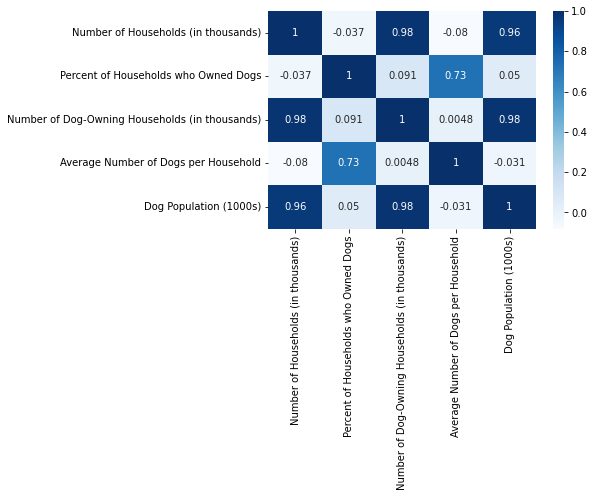

In [9]:
corr_matrix1 = main_df.corr()
sns.heatmap(corr_matrix1, cmap="Blues", annot=True)

At here, I start to add potential regressors.

In [10]:
Cost_df = pd.read_csv('States_cost_pandas.csv')[:51]
Cost_df.head()

,Rank,State,Index,Grocery,Housing,Utilities,Transportation,Health,Misc.
0,1.0,Mississippi,83.3,90.9,66.0,90.5,83.5,92.2,90.9
1,2.0,Kansas,87.1,92.8,71.0,98.8,95.3,100.9,90.6
2,3.0,Oklahoma,88.6,94.2,75.0,94.2,93.2,96.5,93.4
3,4.0,Alabama,88.8,97.6,70.3,100.4,91.9,91.0,95.7
4,5.0,Arkansas,89.1,91.6,76.4,91.2,89.6,85.5,98.0


In [11]:
Cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            51 non-null     float64
 1   State           51 non-null     object 
 2   Index           51 non-null     float64
 3   Grocery         51 non-null     float64
 4   Housing         51 non-null     float64
 5   Utilities       51 non-null     float64
 6   Transportation  51 non-null     float64
 7   Health          51 non-null     float64
 8   Misc.           51 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB


In [12]:
Education_df = pd.read_csv('States_degrees_pandas.csv')[1:]
Education_df.head()

,State,Percent of 25-44 who hold Bachelors' 2019
1,Alabama,28.6
2,Alaska,29.6
3,Arizona,30.0
4,Arkansas,26.4
5,California,38.2


In [13]:
Education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State                                      51 non-null     object 
 1   Percent of 25-44 who hold Bachelors' 2019  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 948.0+ bytes


In [14]:
Density_df = pd.read_csv('States_density_pandas.csv')[:51]
Density_df = Density_df.drop('Density Rank', 1)
Density_df.head()

/var/folders/qb/m523t88x4cbc9m38670pqwvm0000gn/T/ipykernel_83919/4161247220.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Density_df = Density_df.drop('Density Rank', 1)


,State,Resident Population 2020 Census,Population Density 2020 Census
0,Alabama,5024279,99.2
1,Alaska,733391,1.3
2,Arizona,7151502,62.9
3,Arkansas,3011524,57.9
4,California,39538223,253.7


In [15]:
Density_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            51 non-null     object 
 1   Resident Population 2020 Census  51 non-null     object 
 2   Population Density 2020 Census   51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [16]:
Density_df['Resident Population 2020 Census'] = Density_df['Resident Population 2020 Census'].astype(float)
Density_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            51 non-null     object 
 1   Resident Population 2020 Census  51 non-null     float64
 2   Population Density 2020 Census   51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [17]:
Marriage_df = pd.read_csv('States_marriage_divorce_pandas.csv')[:51]
Marriage_df.head()

,State,Marriage Rate 2019,Divorce Rate 2019
0,Alabama,6.7,3.6
1,Alaska,6.5,3.6
2,Arizona,5.3,2.9
3,Arkansas,8.4,4.0
4,California,5.7,NaN


In [18]:
Marriage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               51 non-null     object 
 1   Marriage Rate 2019  51 non-null     float64
 2   Divorce Rate 2019   46 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [19]:
Income_df = pd.read_csv('States_percapitaincome_pandas.csv')[1:52]
Income_df.tail()

,State,2020 Per capita personal income
47,Virginia,61958.0
48,Washington,67126.0
49,West Virginia,44994.0
50,Wisconsin,55593.0
51,Wyoming,61855.0


In [20]:
Income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            51 non-null     object 
 1   2020 Per capita personal income  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 948.0+ bytes


In [21]:
Unemployment_df = pd.read_csv('States_unemployment_rate_pandas.csv')[1:52]
Unemployment_df.head()

,State,Average 2018 Uemployment Rate
1,Alabama,3.9
2,Alaska,6.6
3,Arizona,4.8
4,Arkansas,3.7
5,California,4.2


In [22]:
Unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Average 2018 Uemployment Rate  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 948.0+ bytes


In [23]:
main_df = main_df.merge(Cost_df, how = 'left', on = 'State')
main_df.columns

Index(['State', 'Number of Households (in thousands)',
       'Percent of Households who Owned Dogs',
       'Number of Dog-Owning Households (in thousands)',
       'Average Number of Dogs per Household', 'Dog Population (1000s)',
       'Rank', 'Index', 'Grocery', 'Housing', 'Utilities', 'Transportation',
       'Health', 'Misc.'],
      dtype='object')

In [24]:
main_df = main_df.drop('Rank', 1)
main_df.columns

/var/folders/qb/m523t88x4cbc9m38670pqwvm0000gn/T/ipykernel_83919/1438401147.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  main_df = main_df.drop('Rank', 1)


Index(['State', 'Number of Households (in thousands)',
       'Percent of Households who Owned Dogs',
       'Number of Dog-Owning Households (in thousands)',
       'Average Number of Dogs per Household', 'Dog Population (1000s)',
       'Index', 'Grocery', 'Housing', 'Utilities', 'Transportation', 'Health',
       'Misc.'],
      dtype='object')

<AxesSubplot:>

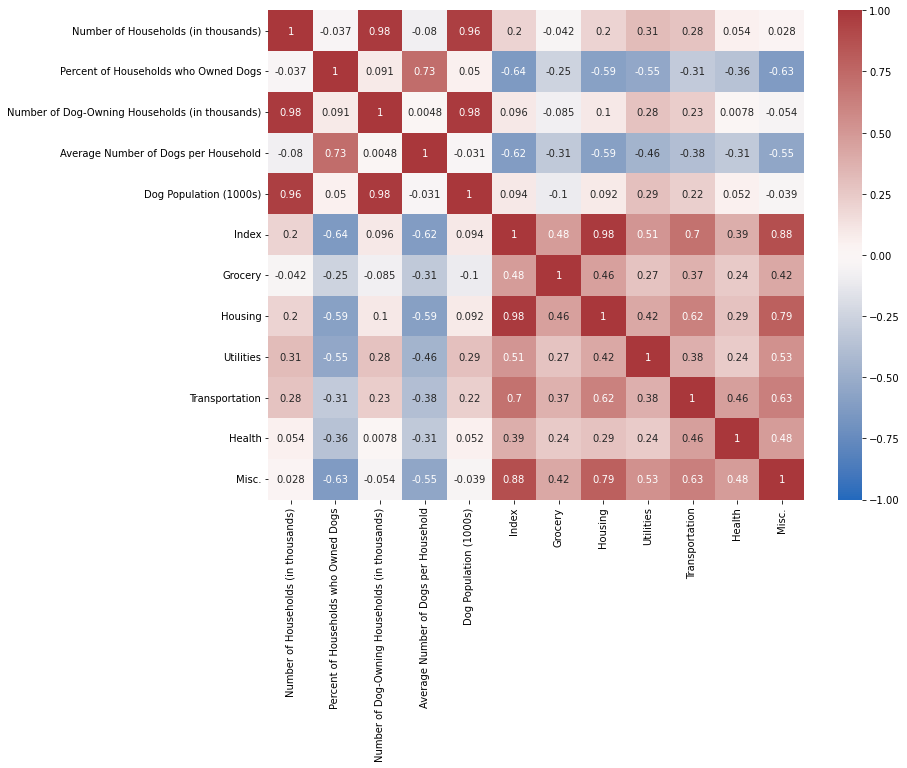

In [25]:
corr_matrix2 = main_df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix2, vmin = -1, vmax = 1, cmap="vlag", center = 0, annot=True)

Among all the variables with which I regress "Percent of Households who Owned Dogs," I find that "Index" has the strongest (negative) correlation, which would make sense. But let's see if we can do better than just that.

In [26]:
main_df['Percent of Households who Owned Dogs'].corr(main_df['Index'])

-0.6355649551472489

<AxesSubplot:xlabel='Index', ylabel='Percent of Households who Owned Dogs'>

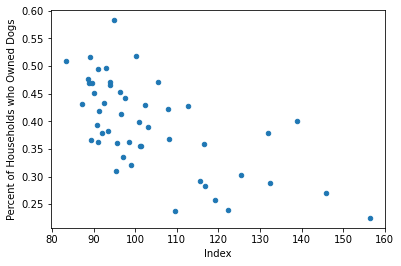

In [27]:
main_df.plot.scatter(x = 'Index', y = 'Percent of Households who Owned Dogs')

In [28]:
main_df = main_df.merge(Density_df, how = 'left', on = 'State')

In [29]:
main_df.corr()

,Number of Households (in thousands),Percent of Households who Owned Dogs,Number of Dog-Owning Households (in thousands),Average Number of Dogs per Household,Dog Population (1000s),Index,Grocery,Housing,Utilities,Transportation,Health,Misc.,Resident Population 2020 Census,Population Density 2020 Census
Number of Households (in thousands),1.000000,-0.037280,0.981386,-0.079952,0.960635,0.196760,-0.042075,0.201355,0.314782,0.280065,0.053769,0.028261,0.997715,-0.089922
Percent of Households who Owned Dogs,-0.037280,1.000000,0.091135,0.726409,0.049776,-0.635565,-0.254677,-0.591388,-0.545018,-0.311222,-0.362580,-0.632311,-0.031429,-0.378964
Number of Dog-Owning Households (in thousands),0.981386,0.091135,1.000000,0.004821,0.980173,0.096269,-0.084723,0.099859,0.284724,0.227558,0.007808,-0.054103,0.984653,-0.111161
Average Number of Dogs per Household,-0.079952,0.726409,0.004821,1.000000,-0.031295,-0.620541,-0.313613,-0.594946,-0.457198,-0.384905,-0.313143,-0.553655,-0.071018,-0.469905
Dog Population (1000s),0.960635,0.049776,0.980173,-0.031295,1.000000,0.094146,-0.102923,0.091857,0.289800,0.221910,0.052362,-0.039418,0.966455,-0.096999
Index,0.196760,-0.635565,0.096269,-0.620541,0.094146,1.000000,0.479505,0.981144,0.514418,0.697063,0.387288,0.881339,0.203809,0.543013
Grocery,-0.042075,-0.254677,-0.084723,-0.313613,-0.102923,0.479505,1.000000,0.456406,0.274683,0.371129,0.243002,0.420454,-0.028554,0.160230
Housing,0.201355,-0.591388,0.099859,-0.594946,0.091857,0.981144,0.456406,1.000000,0.418440,0.621145,0.287565,0.794262,0.208040,0.589155
Utilities,0.314782,-0.545018,0.284724,-0.457198,0.289800,0.514418,0.274683,0.418440,1.000000,0.380115,0.236235,0.531733,0.320659,0.221913
Transportation,0.280065,-0.311222,0.227558,-0.384905,0.221910,0.697063,0.371129,0.621145,0.380115,1.000000,0.461551,0.626953,0.292354,0.080790


<AxesSubplot:xlabel='Population Density 2020 Census', ylabel='Percent of Households who Owned Dogs'>

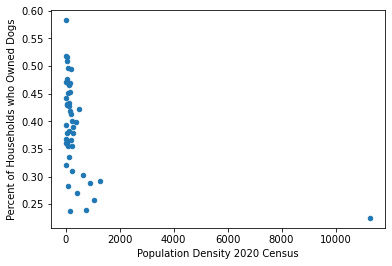

In [30]:
main_df.plot.scatter(x = 'Population Density 2020 Census', y = 'Percent of Households who Owned Dogs')

In [31]:
main_df = main_df.merge(Education_df, how = 'left', on = 'State').merge(Income_df, how = 'left', on = 'State').merge(Marriage_df, how = 'left', on = 'State').merge(Unemployment_df, how = 'left', on = 'State')

In [32]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   State                                           49 non-null     object 
 1   Number of Households (in thousands)             49 non-null     float64
 2   Percent of Households who Owned Dogs            49 non-null     float64
 3   Number of Dog-Owning Households (in thousands)  49 non-null     float64
 4   Average Number of Dogs per Household            49 non-null     float64
 5   Dog Population (1000s)                          49 non-null     float64
 6   Index                                           49 non-null     float64
 7   Grocery                                         49 non-null     float64
 8   Housing                                         49 non-null     float64
 9   Utilities                                    

<AxesSubplot:>

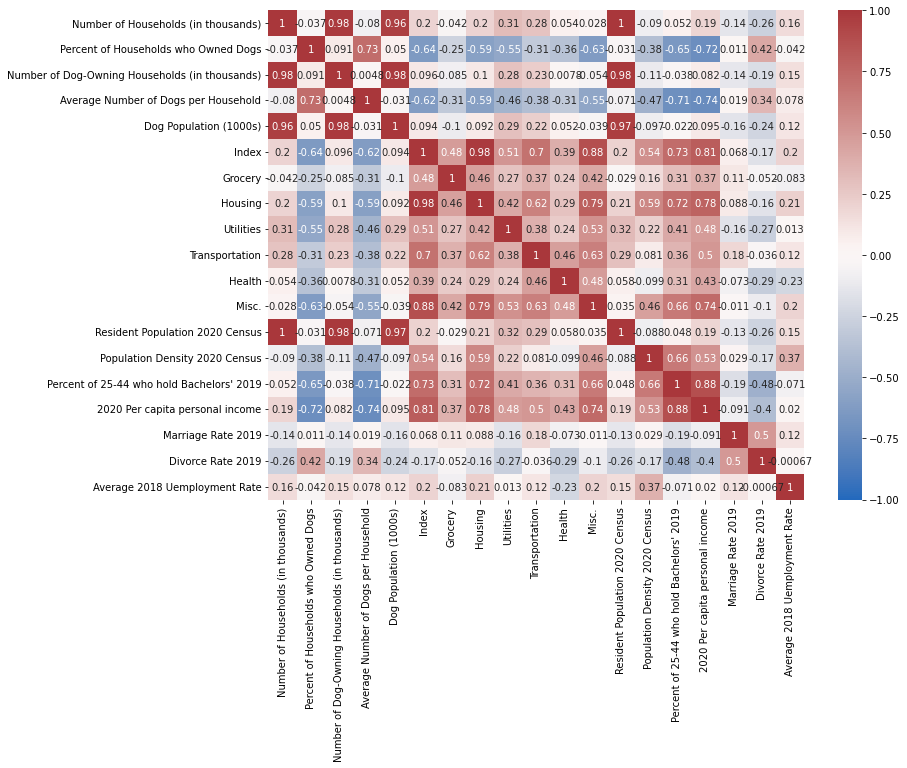

In [33]:
corr_matrix3 = main_df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix3, vmin = -1, vmax = 1, cmap="vlag", center = 0, annot=True)

What I found here was very interesting: while it seems intuitive that the 'Percent of Households who Owned Dogs' and (Cost of Living) 'Index' are negatively correlated, 'Percent of Households who Owned Dogs' and '2020 Per capita personal income' are also negatively correlated.

<AxesSubplot:xlabel='2020 Per capita personal income', ylabel='Percent of Households who Owned Dogs'>

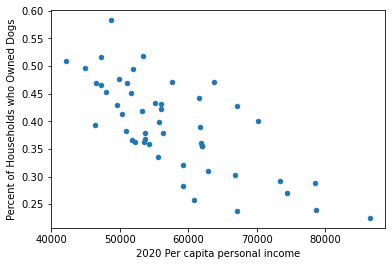

In [34]:
main_df.plot.scatter(x = '2020 Per capita personal income', y = 'Percent of Households who Owned Dogs')

<AxesSubplot:xlabel='Population Density 2020 Census', ylabel='Percent of Households who Owned Dogs'>

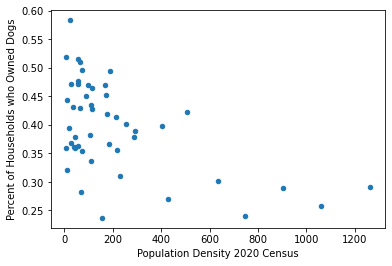

In [35]:
main_df[main_df['State'] != 'District of Columbia'].plot.scatter(x = 'Population Density 2020 Census', y = 'Percent of Households who Owned Dogs')

In [36]:
main_df[main_df['State'] != 'District of Columbia']['Population Density 2020 Census'].corr(main_df[main_df['State'] != 'District of Columbia']['Percent of Households who Owned Dogs'])

-0.538513162125968

In [37]:
main_df['Income Adjustment'] = main_df['2020 Per capita personal income']/ main_df['Index']

In [38]:
main_df[main_df['State'] != 'District of Columbia']['Population Density 2020 Census'].corr(main_df[main_df['State'] != 'District of Columbia']['Percent of Households who Owned Dogs'])

-0.538513162125968

In [39]:
main_df.columns

Index(['State', 'Number of Households (in thousands)',
       'Percent of Households who Owned Dogs',
       'Number of Dog-Owning Households (in thousands)',
       'Average Number of Dogs per Household', 'Dog Population (1000s)',
       'Index', 'Grocery', 'Housing', 'Utilities', 'Transportation', 'Health',
       'Misc.', 'Resident Population 2020 Census',
       'Population Density 2020 Census',
       'Percent of 25-44 who hold Bachelors' 2019',
       '2020 Per capita personal income', 'Marriage Rate 2019',
       'Divorce Rate 2019', 'Average 2018 Uemployment Rate',
       'Income Adjustment'],
      dtype='object')

In [40]:
main2_df = main_df[main_df['State'] != 'District of Columbia'][['State', 'Percent of Households who Owned Dogs', 'Index', 'Population Density 2020 Census', "Percent of 25-44 who hold Bachelors' 2019", '2020 Per capita personal income', 'Marriage Rate 2019', 'Divorce Rate 2019', 'Average 2018 Uemployment Rate', 'Resident Population 2020 Census', 'Income Adjustment']].copy()
main2_df.rename(columns={'Average 2018 Uemployment Rate':'Average 2018 Unemployment Rate'})
main2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State                                      48 non-null     object 
 1   Percent of Households who Owned Dogs       48 non-null     float64
 2   Index                                      48 non-null     float64
 3   Population Density 2020 Census             48 non-null     float64
 4   Percent of 25-44 who hold Bachelors' 2019  48 non-null     float64
 5   2020 Per capita personal income            48 non-null     float64
 6   Marriage Rate 2019                         48 non-null     float64
 7   Divorce Rate 2019                          44 non-null     float64
 8   Average 2018 Uemployment Rate              48 non-null     float64
 9   Resident Population 2020 Census            48 non-null     float64
 10  Income Adjustment           

In [41]:
main2_df.rename({'Average 2018 Uemployment Rate':'2018 Unemployment Rate'}, axis = 1, inplace = True)
main2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State                                      48 non-null     object 
 1   Percent of Households who Owned Dogs       48 non-null     float64
 2   Index                                      48 non-null     float64
 3   Population Density 2020 Census             48 non-null     float64
 4   Percent of 25-44 who hold Bachelors' 2019  48 non-null     float64
 5   2020 Per capita personal income            48 non-null     float64
 6   Marriage Rate 2019                         48 non-null     float64
 7   Divorce Rate 2019                          44 non-null     float64
 8   2018 Unemployment Rate                     48 non-null     float64
 9   Resident Population 2020 Census            48 non-null     float64
 10  Income Adjustment           

Here, I clean up my dataframe even more and focus on variables of my interest. It seems that the strongest correlation is between dog-owning households and income, but negative. That seems counterintutive!

<AxesSubplot:>

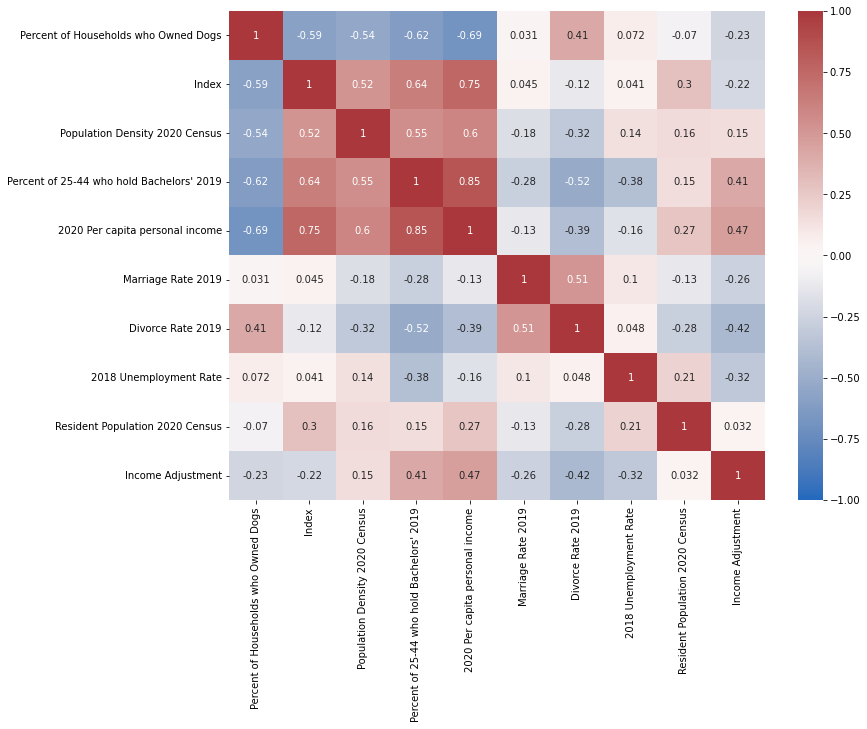

In [42]:
corr_matrix4 = main2_df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix4, vmin = -1, vmax = 1, cmap="vlag", center = 0, annot=True)

<AxesSubplot:xlabel='2020 Per capita personal income', ylabel='Percent of Households who Owned Dogs'>

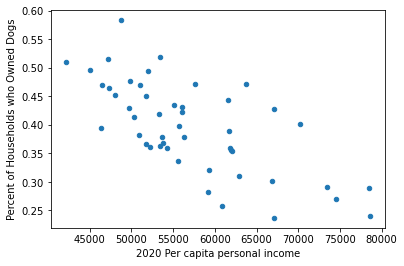

In [43]:
main2_df.plot.scatter(x = '2020 Per capita personal income', y = 'Percent of Households who Owned Dogs')

In [44]:
X = main2_df[['2020 Per capita personal income']]
Y = main2_df[['Percent of Households who Owned Dogs']]
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

Text(0, 0.5, 'Percent of Households who Owned Dogs')

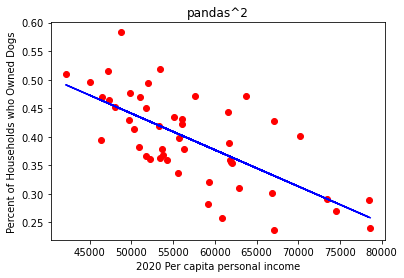

In [45]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('pandas^2')
plt.xlabel('2020 Per capita personal income')
plt.ylabel('Percent of Households who Owned Dogs')

In [46]:
Election_df = pd.read_csv('States_election_pandas.csv')
Election_df = Election_df[['State', 'dem_2020_margin']]
main2_df = main2_df.merge(Election_df, how = 'left', on = 'State')

Election_df.head()

,State,dem_2020_margin
0,Arizona,0.30%
1,Florida,-3.40%
2,Georgia,0.20%
3,Iowa,-8.20%
4,Michigan,2.80%


In [47]:
main2_df['dem_2020_margin'] = main2_df['dem_2020_margin'].str.rstrip('%').astype('float') / 100.0

In [48]:
main2_df.corr()

,Percent of Households who Owned Dogs,Index,Population Density 2020 Census,Percent of 25-44 who hold Bachelors' 2019,2020 Per capita personal income,Marriage Rate 2019,Divorce Rate 2019,2018 Unemployment Rate,Resident Population 2020 Census,Income Adjustment,dem_2020_margin
Percent of Households who Owned Dogs,1.000000,-0.589259,-0.538513,-0.622058,-0.690747,0.030563,0.406520,0.071522,-0.069670,-0.234962,-0.642548
Index,-0.589259,1.000000,0.516688,0.636977,0.754906,0.044699,-0.124342,0.041299,0.296109,-0.221970,0.745234
Population Density 2020 Census,-0.538513,0.516688,1.000000,0.549676,0.601457,-0.183031,-0.319568,0.139392,0.161157,0.151200,0.537953
Percent of 25-44 who hold Bachelors' 2019,-0.622058,0.636977,0.549676,1.000000,0.850167,-0.277354,-0.519487,-0.379142,0.148508,0.410373,0.685806
2020 Per capita personal income,-0.690747,0.754906,0.601457,0.850167,1.000000,-0.132214,-0.387394,-0.164362,0.272326,0.465804,0.639331
Marriage Rate 2019,0.030563,0.044699,-0.183031,-0.277354,-0.132214,1.000000,0.509672,0.103108,-0.127620,-0.263042,-0.045800
Divorce Rate 2019,0.406520,-0.124342,-0.319568,-0.519487,-0.387394,0.509672,1.000000,0.048496,-0.278847,-0.420215,-0.448882
2018 Unemployment Rate,0.071522,0.041299,0.139392,-0.379142,-0.164362,0.103108,0.048496,1.000000,0.208920,-0.322544,0.061231
Resident Population 2020 Census,-0.069670,0.296109,0.161157,0.148508,0.272326,-0.127620,-0.278847,0.208920,1.000000,0.032370,0.310956
Income Adjustment,-0.234962,-0.221970,0.151200,0.410373,0.465804,-0.263042,-0.420215,-0.322544,0.032370,1.000000,-0.058674


<AxesSubplot:xlabel='dem_2020_margin', ylabel='Percent of Households who Owned Dogs'>

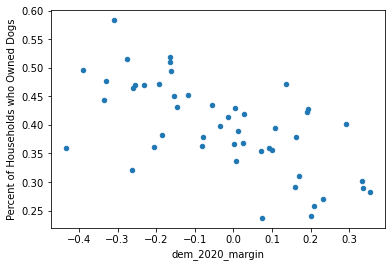

In [49]:
main2_df.plot.scatter(x = 'dem_2020_margin', y = 'Percent of Households who Owned Dogs')

In [50]:
dict = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI"}

main2_df['State'] = main2_df['State'].map(dict)

In [51]:
main2_df.rename({'dem_2020_margin': '2020 Democrat Margin of Victory'}, axis=1, inplace=True)
main2_df['2020 Democrat Margin of Victory'] = main2_df['2020 Democrat Margin of Victory']*100

<AxesSubplot:>

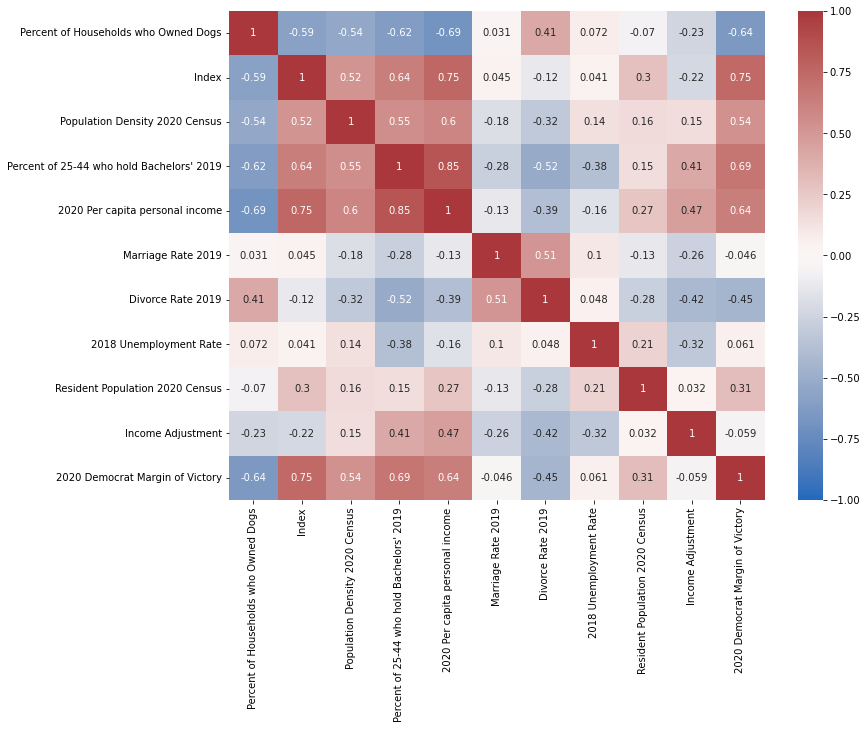

In [52]:
corr_matrix5 = main2_df.corr()
fig = plt.figure(figsize=(12,9))
fig.set_facecolor('white')
sns.heatmap(corr_matrix5, vmin = -1, vmax = 1, cmap="vlag", center = 0, annot=True)

In [53]:
x = main2_df[['2020 Per capita personal income']]
y = main2_df[['Percent of Households who Owned Dogs']]
regression1 = LinearRegression()
regression1.fit(x, y)
y_hat = regression1.predict(x)
regression1.score(x, y)

0.4771310795562267

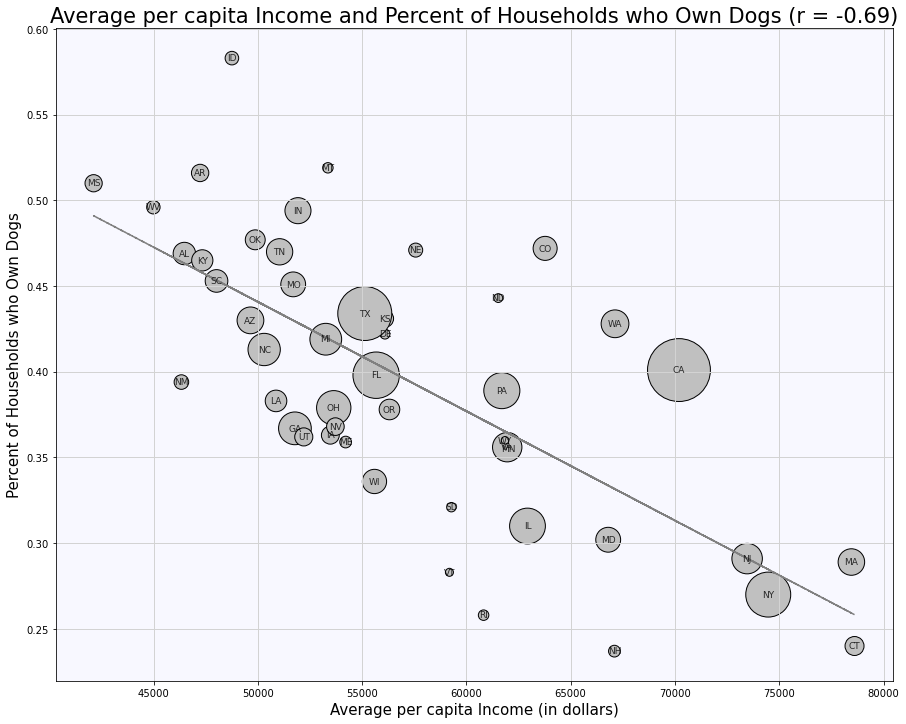

In [54]:
fig = plt.figure(figsize=(15,12))
fig.set_facecolor('white')
ax = fig.add_subplot()
plt.scatter(main2_df['2020 Per capita personal income'], main2_df['Percent of Households who Owned Dogs'], s = main2_df['Resident Population 2020 Census']/10000, alpha = 1, c = 'Silver', edgecolors = 'black')
plt.plot(X, y_hat, color = 'gray', linestyle = '--')

for i in range(len(main2_df)):
    plt.text(main2_df['2020 Per capita personal income'][i], main2_df['Percent of Households who Owned Dogs'][i], main2_df['State'][i], ha = 'center', va = 'center', size = 9, alpha = 0.8)
plt.title('Average per capita Income and Percent of Households who Own Dogs (r = -0.69)', fontsize = 21)

plt.xlabel('Average per capita Income (in dollars)', fontsize = 15)
# ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.grid(which = 'major', axis = 'x', linewidth = 1, color = 'lightgray')

plt.ylabel('Percent of Households who Own Dogs', fontsize = 15)
# ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.grid(which = 'major', axis = 'y', linewidth = 1, color = 'lightgray')

ax.set_facecolor('ghostwhite')

In [55]:
x2 = main2_df[['2020 Democrat Margin of Victory']]
y2 = main2_df[['Percent of Households who Owned Dogs']]
regression1 = LinearRegression()
regression1.fit(x2, y2)
y2_hat = regression1.predict(x2)
regression1.score(x2, y2)

0.41286820620999787

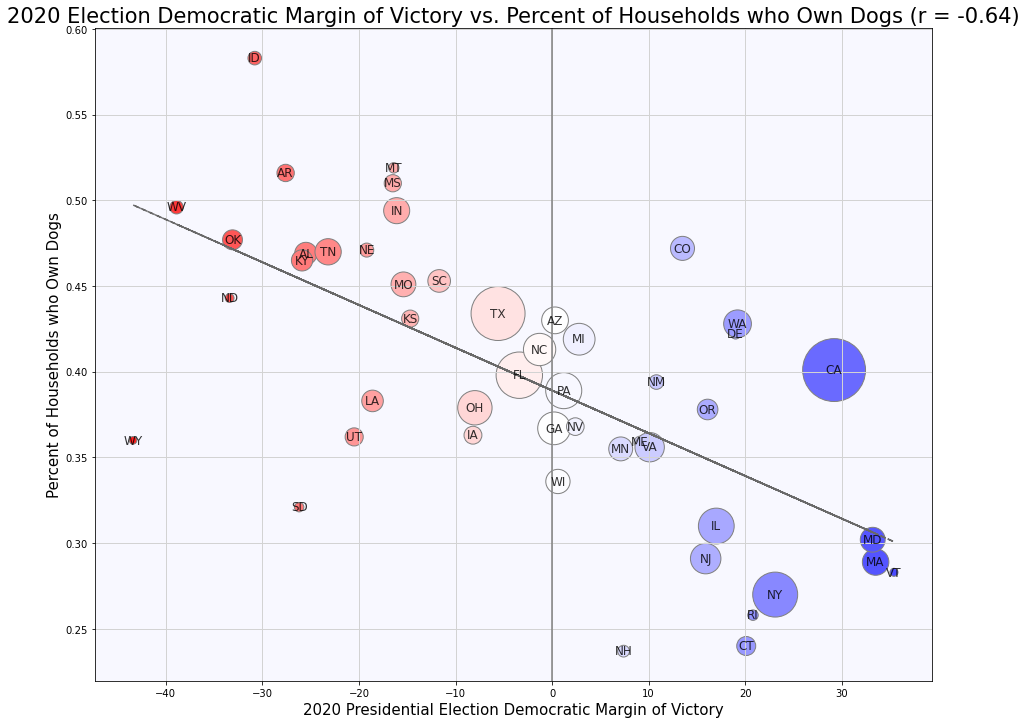

In [56]:
fig = plt.figure(figsize=(15,12))
fig.set_facecolor('white')
ax = fig.add_subplot()
#normalize = colors.Normalize(vmin=-50, vmax=50)
plt.scatter(main2_df['2020 Democrat Margin of Victory'], main2_df['Percent of Households who Owned Dogs'], c = main2_df['2020 Democrat Margin of Victory'], s = main2_df['Resident Population 2020 Census']/10000, cmap = 'bwr_r', norm = colors.Normalize(vmin=-50, vmax=50), edgecolors= 'gray')
plt.plot(x2, y2_hat, color = 'dimgrey', linestyle = '--')
#ax.spines['left'].set_position('zero')
#ax.spines['bottom'].set_position('center')
plt.axvline(0, c = 'gray')
for i in range(len(main2_df)):
    plt.text(main2_df['2020 Democrat Margin of Victory'][i], main2_df['Percent of Households who Owned Dogs'][i], main2_df['State'][i], ha = 'center', va = 'center', size = 12, alpha = 0.8)
plt.title('2020 Election Democratic Margin of Victory vs. Percent of Households who Own Dogs (r = -0.64)', fontsize = 21)

plt.xlabel('2020 Presidential Election Democratic Margin of Victory', fontsize = 15)
# ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.grid(which = 'major', axis = 'x', linewidth = 1, color = 'lightgray')

plt.ylabel('Percent of Households who Own Dogs', fontsize = 15)
# ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.grid(which = 'major', axis = 'y', linewidth = 1, color = 'lightgray')

ax.set_facecolor('ghostwhite')